In [1]:
####### INIT ######################################################################################

from context import rmlib
import rmlib.rmtools as rm
from config import robotConfig

robot = rmlib.robot.Robot( robotConfig )

#Imports 
from time import sleep
import numpy as np
import rmlib
from rmlib.rmtools.assembly_trees import augment_RM

augment_RM( robot )

%store -r

Loaded: /home/nvidia/dev_rmstudio/rmlib/rmlib/rmtools Exists?: True
Loaded: /home/nvidia/dev_rmstudio/rmlib Exists?: True
Setting up robot please wait...
my_components: {'arm_config': {'max_joint_accel': 1.4, 'ip_address': '192.168.0.101', 'default_linear_accel': 0.8, 'max_joint_speed': 1.05, 'max_linear_accel': 1.2, 'max_linear_speed': 0.25, 'xmlrpc_port': '8003', 'class_name': 'RTDEwrapper', 'default_joint_speed': 0.7, 'default_joint_accel': 0.8, 'module_name': 'arms.UR_RTDE_wrapper', 'default_linear_speed': 0.1}, 'cam_config': {'camera_model': 'd410', 'module_name': 'cameras.realsense', 'class_name': 'RealSense', 'ci_cam_offset': [-0.036, -0.028, -0.079], 'pc_cam_offset': [-0.037, -0.033, -0.079]}, 'ft_config': {'remote_ip': '', 'max_workers': 10, 'filter': {'alpha': 0.012, 'beta': 0.035}, 'dataHz': 50.0, 'class_name': 'OptoForce', 'local_ip': '127.0.0.1', 'ip_address': '192.168.0.100', 'remote_port': 10000, 'module_name': 'sensors.ftsensor_optoforce', 'local_port': 20000}, 'hand_co

In [2]:
####### LIBS ######################################################################################

# Import Pytrees
import py_trees
from py_trees.tests import Timeout_Success
from py_trees.composites import Sequence , Selector

from assembly_trees import *

import math
from pmath import translate_pose , get_disance_between_poses , pose_components

from utils import is_matx_list
from math import radians

print( "\n##!## READY ##!##" )


##!## READY ##!##


In [21]:
from utils import HeartRate
import time

def test_FT_latency( N = 100, hz = 50 ):
    """ Attempt to test the data latency for the ft sensor """
    rate = HeartRate( hz )
    data = np.zeros( (N,6) )
    dlay = np.zeros( (N)   )
    last = time.time()
    for i in range(N):
        data[i] = robot.ft.get_wrist_force()
        now     = time.time()
        dlay[i] = now - last
        last    = now
        rate.sleep()
    return {
        'avg': np.mean( dlay ),
        'avg_freq': 1.0 / np.mean( dlay ),
        'max': np.amax( dlay ),
        'sum': sum( dlay ),
        'delay': dlay,
    }

In [28]:
info = test_FT_latency( N = 7500, hz = 50 )
print( info['avg'], info['avg_freq'], info['max'], info['sum'] )

0.020184551652272543 49.54283935692036 0.028249263763427734 151.38413739204407


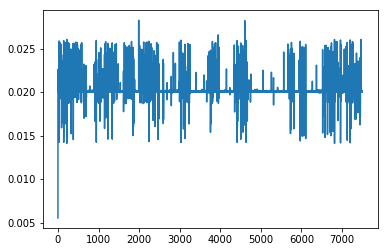

In [29]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot( info['delay'] )

In [30]:
def test_RTDE_latency( N = 100, hz = 50 ):
    """ Attempt to test the data latency for the ft sensor """
    rate = HeartRate( hz )
    data = np.zeros( (N,6) )
    dlay = np.zeros( (N)   )
    last = time.time()
    for i in range(N):
        data[i] = robot.arm.get_tcp_pose_vec()
        now     = time.time()
        dlay[i] = now - last
        last    = now
        rate.sleep()
    return {
        'avg': np.mean( dlay ),
        'avg_freq': 1.0 / np.mean( dlay ),
        'max': np.amax( dlay ),
        'sum': sum( dlay ),
        'delay': dlay,
    }

In [35]:
info = test_FT_latency( N = 100, hz = 50 )
print( info['avg'], info['avg_freq'], info['max'], info['sum'] )

0.020007164478302003 49.98209521816604 0.031705617904663086 2.0007164478302


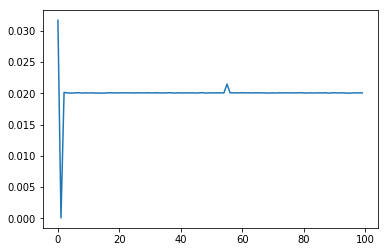

In [36]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot( info['delay'] )